In [ ]:
%autosave 0

*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<img style="padding: 10px; float:left;" alt="CC-BY-SA icon.svg in public domain" src="https://upload.wikimedia.org/wikipedia/commons/d/d0/CC-BY-SA_icon.svg" width="125">

# Numpy

Numpy (Numerical Python) is Python's library for numerical data, and provides a wealth of functionality for working with array data.

Numpy features include:
  * A fast and efficient multidimensional array object ndarray
  * Functions for performing computations on arrays
  * Tools for reading and writing array-based datasets to disk
  * Linear algebra operations, and random number generation

This short tutorial is a brief introduction.  For more information please refer to one of the following resources:

* The Numpy [documentation](https://numpy.org/doc/stable/), which includes multiple tutorials.
* The [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) by Jake Vander Plas.

Numpy is going to be our primary Python programming tool for this course, and we will pick up more features as we go along.

Our first step is to **import** the package (note the "import as" shortcut):

In [1]:
import numpy as np

**Python note:**  Instead of the above import, we could have done ``from numpy import *``, which would have made every statement shorter by not having to write ``np.`` before each Numpy command.  That is not a good idea, as the Numpy namespace conflicts with built in Python functions like ``min`` or ``max``.

Arrays are the standard data containers in Numpy, and can have any number of dimensions.

Let's create a one dimensional array:

In [ ]:
my_array = np.array([1, 2, 3])
my_array

What have we gained over using a Python list?

In [ ]:
my_list = [1, 2, 3]

In fact, Numpy arrays are less flexible than Python lists:

In [ ]:
my_list[0] = 'a'
try :
    my_array[0] = 'a'
except :
    print("")

The reduced flexibility of Numpy arrays comes with improved efficiency both in terms of storage (why?) execution, and a wealth of functionality for fast manipulation of numeric data.

Furthermore, using Numpy's C API, libraries written in C or Fortran, can operate on the data stored in a NumPy array without needing to copy the data. 

Let's demonstrate the speed advantage of Numpy arrays:

In [ ]:
import numpy as np
my_array = np.arange(1000000)
my_list = list(range(1000000))
# Note: why not simply do my_list = range(10000000)?

In [ ]:
%timeit my_array2 = my_array * 2

In [ ]:
%timeit my_list2 = [x * 2 for x in my_list]

This clearly demonstrates the power of using Numpy arrays over Python lists.

**Note about timing Python code**
``%time`` is another magic command that can be used to measure the execution time of code snippets.  ``%timeit`` results are generally more accurate which is a result of the fact that ``%timeit`` does some clever things under the hood to prevent system calls from interfering with the timing. For example, it prevents cleanup of unused Python objects (known as garbage collection) which might otherwise affect the timing. For this reason, ``%timeit`` results are usually noticeably faster than ``%time`` results (see [this article](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) for more information about profiling Python code).

### Numpy ndarrays

Numpy ndarrays enable you to perform mathematical operations on entire arrays in a single operation without requiring for loops.  This is called *vectorization*, and is key for writing efficient machine learning code.

For example:

In [ ]:
data = np.array( [ [1,2,3], [4,5,6] ])
data

In [ ]:
data * 10    # multiply array by a scalar
data + data  # add arrays

You can also perform Boolean operations on arrays:

In [ ]:
a1 = np.array([[1., 2., 3.], [4., 5., 6.]])
a2 = np.array([[0., 4., 1.], [7., 2., 12.]])
a2 > a1

Every array has a shape, which is a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array:


In [ ]:
data.shape
data.dtype

While it's clear what Numpy does when asked to add a scalar to an array or add two arrays of the same size, check what happens when adding two arrays of unequal size, e.g. add a one dimensional array to a two dimensional array

In [ ]:
# define two arrays, one which is two dimensional with a shape (2,3), 
# and another which is one dimensional.
# what will its size need to be for the operation to work?
# what is Numpy doing in this case?

Note that Numpy inferred the type from the data that we provided.  You can check what happens if there are floats in the input to the array constructor.  The `dtype` attribute will tell you what kind of array got created.

In [ ]:
arr1 = np.array([6, 7.5, 8, 0, 1])
print(arr1,arr1.dtype)
arr2 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(arr2,arr2.dtype)

In [ ]:
print(arr1.shape, arr2.shape)


Contrast this with the Python ``len`` builtin:

In [ ]:
len(arr1), len(arr2)

### Data types

Each array has a dtype associated with it, which is the type used to store the elements of the array.
The numerical dtypes are named as follows: a type name, like float or int, followed by a number indicating the number of bits per element. A standard double-precision floating-point value (what’s used under the hood in Python’s float object) takes up 8 bytes or 64 bits. Thus, this type is known in Numpy as ``float64``.



In [ ]:
a1 = np.array([1, 2, 3], dtype=np.float64)
a2 = np.array([1, 2, 3], dtype=np.int32)
a1.dtype
a2.dtype

What would be the resulting data type for an array that contains strings and numbers?

In [ ]:
# create an array that contains strings and numbers and check its data type

### Creating arrays

Numpy has plenty of ways for creating all kinds of arrays - initialized with zeros, ones, or random values.  Typically they have a `shape` argument that determines the size of the array in each dimension.

Here are some examples:


Creating an array of zeros:

In [9]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

An array of ones:

In [10]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

### Generating random numbers

Random numbers are very useful in machine learning!

We can create integers:

In [20]:
from numpy.random import default_rng
rng = default_rng(42)
rng.integers(1,7, size=(10,))

array([1, 5, 4, 3, 3, 6, 1, 5, 2, 1])

Random floating point numbers between 0 and 1:

In [101]:
rng.random(size=(3,3))  # you can also call it as rng.random((3,3))

array([[0.4434142 , 0.22723872, 0.55458479],
       [0.06381726, 0.82763117, 0.6316644 ],
       [0.75808774, 0.35452597, 0.97069802]])

Numpy can also generate random numbers with other distributions, e.g. the normal (aka Gaussian) distribution:

In [102]:
rng.standard_normal(size=(5,))

array([-0.15452948, -0.42832782, -0.35213355,  0.53230919,  0.36544406])

The following plot should convince us that `np.standard_normal` is working as advertised:

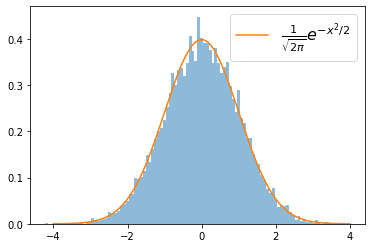

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

a = rng.standard_normal(size=(10000,))
plt.hist(a, 100, density=True, alpha=0.5);

x = np.linspace(-4, 4, 1000)
normal = (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)
plt.plot(x,normal, label=r'$\frac{1}{\sqrt{2 \pi}}e^{-x^2/2}$');
plt.legend(fontsize='16');

### Ranges

The Numpy equivalent of the `range` function, which provides fractional strides:

In [21]:
np.arange(2, 3, 0.1)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])

The `linspace` function provides similar functionality with a slightly different interface:

In [22]:
np.linspace(1., 4., 6)

array([1. , 1.6, 2.2, 2.8, 3.4, 4. ])

### Sidenote - getting **help** on python objects:

For getting help e.g. on the Numpy **linspace** function you can do one of the following:

```python
?np.linspace
```

or

```python
help(np.linspace)
```

In [ ]:
help(np.linspace)

### Array indexing and slicing

We'll begin with one dimensional arrays:

In [24]:
a = np.array([2,3,4])
print(a[0], a[1], a[2])
a[0] = 5                  # Change an element of the array
a

2 3 4


array([5, 3, 4])

Can you explain what's happening in the following piece of code?

In [25]:
b = a
b[0] = 1234
print(a)
print(b)

[1234    3    4]
[1234    3    4]


Slices in Numpy are similar to slices of Python lists:

In [27]:
a = np.arange(10)
a[5:8]

array([5, 6, 7])

You can assign values to a slice:

In [28]:
a[5:8] = 12
a

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

Do slices create copies of the underlying data?  Let's see:

In [29]:
a_slice = a[5:8]
a_slice

array([12, 12, 12])

In [30]:
a_slice[1] = 12345
a

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

Numpy has been designed to be able to work with very large arrays, so eagerly copying data could cause severe performance and memory problems.

If you want a copy of a slice instead of a view, you will need to explicitly copy it using e.g. ``arr[5:8].copy()``.


### Two dimensional arrays

Let's look at two dimensional arrays.

In [52]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

print(a[0, 0], a[0, 1])
print(a[0][0], a[0][1], a[1][0])

a.shape

1 2
1 2 5


(3, 4)

The latter form of indexing works, because each row of a two dimensional array is an array as well.

So, to access the first row:

In [53]:
row = a[0]    # the first row of a
row, row.shape

(array([1, 2, 3, 4]), (4,))

To access a column:

In [54]:
col = a[:, 0]
col, col.shape

(array([1, 5, 9]), (3,))

We can perform slicing on multiple dimensions, creating a submatrix:

In [55]:
submatrix = a[1:3, 1:4]
submatrix, submatrix.shape

(array([[ 6,  7,  8],
        [10, 11, 12]]),
 (2, 3))

### Fancy indexing

You can index an array using an integer array:


In [56]:
a[ [0, 2] ]   # extract a given set of rows

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [57]:
a[:, [0,2]]  # extract a given set of columns

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

**Question:** does indexing using an array create a copy of the array or simply a view, as in the case of slicing?

In [ ]:
## write some code to answer this question

### Exercises

describe the effect of each of the following slices:

In [122]:
a2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [123]:
a2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [124]:
a2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [125]:
a2d[1, :2]

array([4, 5])

In [127]:
a2d[:, :]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Boolean indexing

In [31]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = rng.standard_normal(size=(7, 4))
(names,data)

(array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4'),
 array([[-1.0473137 , -0.41771284,  1.01717501, -0.04319829],
        [-1.9499213 ,  0.66586187, -0.54492155, -0.19605896],
        [ 3.05383855, -1.53655874,  2.48321603,  1.68357702],
        [-0.12001071, -0.28688252,  0.2657784 ,  0.56895569],
        [-0.42859219, -3.02992953, -1.91181792, -0.9289584 ],
        [ 0.66861726, -1.55643975, -0.38362774,  1.41376881],
        [ 0.40651856, -0.75778725,  0.22659992, -0.59430857]]))

In [32]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [33]:
data[names == 'Bob']

array([[-1.0473137 , -0.41771284,  1.01717501, -0.04319829],
       [-0.12001071, -0.28688252,  0.2657784 ,  0.56895569]])

In [36]:
cond = names == 'Bob'
print(~cond)
data[~cond]

[False  True  True False  True  True  True]


array([[-1.9499213 ,  0.66586187, -0.54492155, -0.19605896],
       [ 3.05383855, -1.53655874,  2.48321603,  1.68357702],
       [-0.42859219, -3.02992953, -1.91181792, -0.9289584 ],
       [ 0.66861726, -1.55643975, -0.38362774,  1.41376881],
       [ 0.40651856, -0.75778725,  0.22659992, -0.59430857]])

In [35]:
cond = (names == 'Bob') | (names == 'Will')
print(cond)
data[cond]

[ True False  True  True  True False False]


array([[-1.0473137 , -0.41771284,  1.01717501, -0.04319829],
       [ 3.05383855, -1.53655874,  2.48321603,  1.68357702],
       [-0.12001071, -0.28688252,  0.2657784 ,  0.56895569],
       [-0.42859219, -3.02992953, -1.91181792, -0.9289584 ]])

**Note:** The Python keywords ``and`` and ``or`` do not work with boolean arrays. You need to use & (and) and | (or) instead.

We can use conditions to modify an array:

In [37]:
print(data < 0)
data[data < 0] = 0
data

[[ True  True False  True]
 [ True False  True  True]
 [False  True False False]
 [ True  True False False]
 [ True  True  True  True]
 [False  True  True False]
 [False  True False  True]]


array([[0.        , 0.        , 1.01717501, 0.        ],
       [0.        , 0.66586187, 0.        , 0.        ],
       [3.05383855, 0.        , 2.48321603, 1.68357702],
       [0.        , 0.        , 0.2657784 , 0.56895569],
       [0.        , 0.        , 0.        , 0.        ],
       [0.66861726, 0.        , 0.        , 1.41376881],
       [0.40651856, 0.        , 0.22659992, 0.        ]])

In [ ]:
data[names != 'Joe'] = 7
data

### Reshaping arrays

What is the effect of the following operation?

In [38]:
a = np.arange(15).reshape((3, 5))
(a,a.shape)

(array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]]),
 (3, 5))

Here's where it becomes interesting...

In [39]:
a = np.arange(15).reshape((-1, 5))
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

This is a neat trick:  -1 here means "as many rows as needed"

In [40]:
a.T, a.T.shape

(array([[ 0,  5, 10],
        [ 1,  6, 11],
        [ 2,  7, 12],
        [ 3,  8, 13],
        [ 4,  9, 14]]),
 (5, 3))

This is called the "transpose" of a matrix, and is also available as a function or method:

In [41]:
np.transpose(a)   # can also do a.transpose()

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

### Universal Functions: Fast Element-Wise Array Functions

A universal function, or *ufunc*, is a function that performs element-wise operations on data in an ndarray. 


In [75]:
a = np.arange(5)
print(np.sqrt(a))
print(np.exp(a))
print(np.square(a))  # almost the same as a**2

[0.         1.         1.41421356 1.73205081 2.        ]
[ 1.          2.71828183  7.3890561  20.08553692 54.59815003]
[ 0  1  4  9 16]


A complete list of ufuncs is available in the [Numpy documentation](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

### Stacking arrays

You can extend arrays by stacking them horizontally or vertically:

In [44]:
x = np.array( [[1,2],[3,4]] )
y = np.array( [[5,6],[7,8]] )
np.vstack([x,y]),np.hstack([x,y])

(array([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]]),
 array([[1, 2, 5, 6],
        [3, 4, 7, 8]]))

In machine learning vertical and horizontal stacking of arrays is used to add features or training examples to a feature matrix $X$.

### Avoid loops when you can

Consider the following piece of code:

In [45]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    x[i] = x[i] + v
x

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

As we know, loops are slow in python.  There is a much more efficient way of doing this:

In [46]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
x + v

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

This is called **broadcasting**.

### Mathematical  and statistical operations on arrays

Numpy provides functionality for a variety of mathematical operations over arrays:

* `np.sum` - sum
* `np.mean` - arithmetic mean
* `np.average` - average (can compute weighted averages)
* `np.std` - standard deviation
* `np.median` - median
* `np.max`, `np.min` - maximum/minimum
* `np.argmax`, `np.argmin` - index of maximum/minimum

And many [more](https://numpy.org/doc/stable/reference/routines.statistics.html).

Applying these methods to a two dimensional array computes the sum (or other operation) over the entire array:

In [65]:
a = rng.standard_normal(size=(5, 4))
print(a)
print(a.sum()) # same as np.sum(a) 

[[ 1.44968436  0.83737538  1.08697518 -0.8632786 ]
 [-0.44550011  0.85939831 -0.34895735 -0.46357049]
 [-0.5402034  -0.77296177 -0.22932718  0.92137264]
 [ 0.88510126 -2.22950639  0.08389579 -2.3289431 ]
 [ 1.23525139 -0.43607404  0.3972515   0.23046729]]
-0.6715493281267273


Sums can be performed along a given axis:

In [64]:
a.sum(axis=1)

array([-0.02884173, -0.63641493, -0.37004102, -0.13948989, -0.11781848])

This can seem a bit confusing, but think about the axis keyword as determining the axis that remains as a result of performing the operation.  It's NOT the axis over which the operation is performed!

In [63]:
a.sum(axis=0)

array([-1.10168914,  1.39525327, -1.57202892, -3.89195937])

In [129]:
big_array = rng.random(size=(1000000,))
big_list = list(big_array)
%timeit sum(big_list)
%timeit np.sum(big_array)

95.3 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
596 µs ± 16.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Numpy as a tool for expressing mathematical formulas

One of the great advantages of using Numpy is that many of the mathematical formulas that are common in machine learning can be succinctly expressed in Numpy.  Consider for example the computation of the mean-squared error which is used to quantify the quality of a regression method:

$$
\mathrm{MSE} = \frac{1}{N}\sum_{i=1}^N (\hat{y}_i - y_i)^2,
$$

where $y_1,\ldots,y_N$ are the given labels and $\hat{y}_1,\ldots,\hat{y}_N$ are the predicted labels.

This formula is easy to express using a single line of code:

In [74]:
y = np.array([1, 1.5, 2])
y_pred = np.array([0.8, 1.6, 2.4])

(1/len(y)) * np.sum( (y - y_pred)**2 )

# alternative:  (1/len(y)) * np.sum( np.square(y - y_pred))


0.06999999999999997

### Exercise

* Compute the accuracy of a machine learning classifier.  In this case the labels are discrete, and the error is expressed as:
$$
\mathrm{accuracy} = \frac{1}{N}\sum_{i=1}^N [\hat{y}_i = y_i].
$$
Here the notation $[\mathrm{condition}]$ is the [Iverson bracket](https://en.wikipedia.org/wiki/Iverson_bracket), which is equal to 1 if the condition is true, and 0 otherwise.

In [ ]:
y = np.array([0, 1, 1, 1, 0])
y_pred = np.array([1, 0, 1, 1, 0])
# accuracy = ...

### Example:  Random Walks

A random walk in one dimension is a random process where at each step the walker goes a unit step either to the left or to the right.  Random walks have interesting statistical properties that can be investigated by simulating them.

In [90]:
import random
def random_walk(n):
    """Return a list of positions in a random walk"""
    position = 0
    walk = [position]
    for i in range(n):
        position += 2*random.randint(0, 1) - 1
        walk.append(position)
    return walk

walk = random_walk(1000)

In [91]:
%timeit random_walk(1000)

1.63 ms ± 24.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Here's a much more efficient Numpy version:

In [130]:
def random_walk_vectorized(n):
    steps = rng.choice([-1,+1], n)
    return np.cumsum(steps)

walk = random_walk_vectorized(1000)

In [131]:
%timeit random_walk_vectorized(1000)

46.8 µs ± 1.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


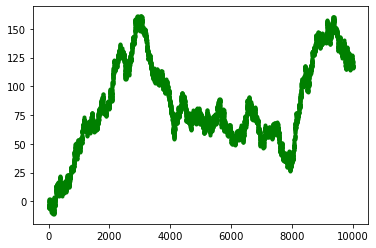

In [96]:
num_steps = 10000
distance = random_walk_vectorized(num_steps)
t = np.arange(num_steps)
plt.plot(t, distance, 'g.');

To investigate statistical properties of random walks we'll need to generate many random walks.  To make this efficient, we'll do it all at once:

In [132]:
nwalks = 5000
nsteps = 1000
steps = rng.choice([-1, 1], size=(nwalks, nsteps))
walks = steps.cumsum(axis=1)
sq_distance = walks**2
mean_sq_distance = np.mean(sq_distance, axis=0)

In [98]:
steps.shape, walks.shape

((5000, 1000), (5000, 1000))

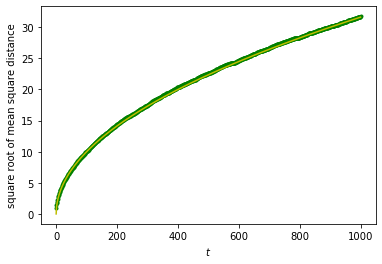

In [133]:
t = np.arange(nsteps)
plt.plot(t, np.sqrt(mean_sq_distance), 'g.',t, np.sqrt(t), 'y-')
plt.xlabel("$t$")
plt.ylabel("square root of mean square distance");

### Exercises

* Create a 10x10 array with random integer values and find the maximum values in the entire array, and in each column / row.


* Let's consider the problem of data normalization/scaling:  in statistics and machine learning it is often desirable to convert data to a range, say between 0 and 1 (see this wikipedia article on [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling)).  As a first step, perform [min max rescaling](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization) ) over a one-dimensional array.  Next, assume you are given a two dimensional array, where you need to do that on each column separately.  Test that your code works correctly!


In [ ]:
rng=np.random.default_rng()

# one dimensional array:
x = rng.standard_normal(size=(100,))
# code for min-max rescaling of an array (one line of code)

X=rng.standard_normal(size=(50,100))
# code for min-max rescaling of a 2-d array (one line of code)
# with no for loops


* Create random vector of size 100, where each element is between 0 and 5, and replace the maximum value by 0